Побудувати двонаправлену RNN для розрахунку функції із шумом.
Підібрати власну архитектуру, кількість шарів, функції активації.
Побудувати графік.
N = 10000
data = np.array([np.функція for x in range(N)]) + 0.1*np.random.randn(N)
В якості функції взяти тригонометричну функцію, наприклад
𝑐𝑜𝑠(3𝑥) , 𝑠𝑖𝑛(𝑥 ∕ 5) , 𝑠𝑖𝑛(𝑥 + 3) ∕ 2 і тд

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GRU, Input, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Створення даних

Спочатку визначаю кількість точок даних N, рівну 10000. Потім створюю масив 'data', використовуючи генератор списку, де кожен елемент це косинус від x поділеного на 5, до якого доданий шум – випадкове число з нормального розподілу, помножене на 0.1. Це додає випадковість до наших даних, роблячи їх більш реалістичними.2 і тд

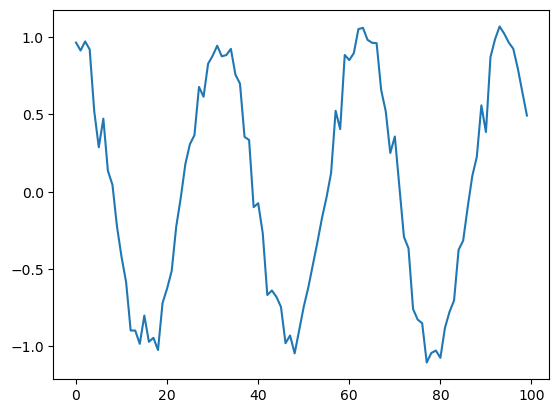

In [2]:
# Генерація синтетичних даних за допомогою функції косинуса з шумом
N = 10000
data = np.array([np.cos(x/5) for x in range(N)]) + 0.1 * np.random.randn(N)
plt.plot(data[:100])
plt.show()

# Довжина послідовності

Змінна 'off' задає зсув, який використовується для створення діагональних матриць від вхідних даних. Далі, створюю масив 'X', де кожен елемент — це діагональна матриця, створена з частини масиву 'data', що включає елементи від поточного індексу 'i' до 'i + off' та від 'i + off + 1' до 'i + length'. Масив 'Y' призначений для вихідних даних і містить елементи масиву 'data', починаючи з 'off' і закінчуючи на 'N - off - 1', що відповідає передбачуваним значенням, які модель повинна навчитися прогнозувати на основі 'X'.

In [3]:
# Визначаємо довжину послідовності для підготовки вхідних і вихідних даних для моделі
off = 3
length = off * 2 + 1
X = np.array([np.diag(np.hstack((data[i:i + off], data[i + off + 1:i + length]))) for i in range(N - length)])
Y = data[off:N - off - 1]

# Створення моделі

Створила RNN за допомогою бідирекційного шару GRU (Gated Recurrent Unit). Спочатку ініціалізую модель як послідовну (Sequential), що дозволяє додавати шари один за одним. Шар введення (Input) задає форму вхідних даних, яка відповідає розмірам нашої матриці без однієї строки та стовпця. Далі, я додаю бідирекційний шар GRU з 4 одиницями, що дозволяє мережі ефективніше враховувати контекст як з минулих, так і з майбутніх точок даних (опція return_sequences=True забезпечує передачу виводу на наступний шар для всіх часових кроків). Шар відкидання (Dropout) зі значенням 0.2 допомагає запобігти перенавчанню моделі, випадково ігноруючи деякі нейронні зв'язки під час тренування. Потім я додала ще один бідирекційний GRU шар, але з 2 одиницями. В кінці я використала Dense шар з однією одиницею та активаційною функцією 'tanh', яка дозволяє моделі прогнозувати неперервні значення у діапазоні від -1 до 1.

In [4]:
# Bidirectional RNN model
model = Sequential()
model.add(Input((length - 1, length - 1)))
model.add(Bidirectional(GRU(4, return_sequences=True))) 
model.add(Dropout(0.2))  
model.add(Bidirectional(GRU(2)))  
model.add(Dense(1, activation='tanh'))  
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 6, 8)           │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 8)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 4)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437 (1.71 KB)

 Trainable params: 437 (1.71 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Компіляція та тренування моделі
model.compile(loss='mean_squared_error', optimizer=Adam(0.01))
history = model.fit(X, Y, batch_size=32, epochs=10)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1136
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0160
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0147
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0144
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0140
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0136
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0129
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0132
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0132
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0134


In [7]:
# Передбачення моделі для графіку
M = 200
XX = np.zeros(M)
XX[:off] = data[:off]
for i in range(M - off - 1):
    x = np.diag(np.hstack((XX[i:i + off], data[i + off + 1:i + length])))
    x = np.expand_dims(x, axis=0)
    y = model.predict(x)
    XX[i + off] = y

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━

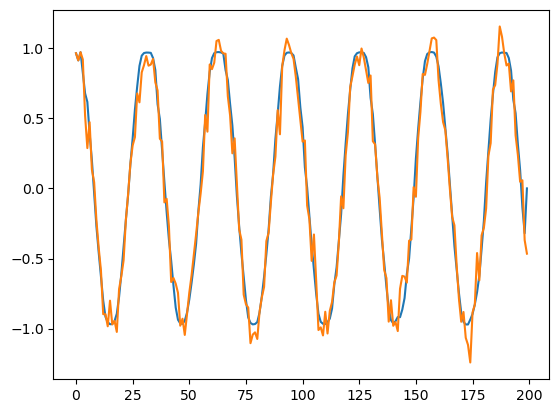

In [9]:
# Побудова прогнозів моделі поряд з вихідними даними
plt.plot(XX[:M])
plt.plot(data[:M])
plt.show()